In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
import os
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [20, 20]


In [3]:
from fastai.imports import *

In [4]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [5]:
data_path = '/home/tyler/Projects/datasets/the-simpsons-characters-dataset'

In [6]:
torch.cuda.is_available()

True

In [7]:
torch.backends.cudnn.enabled

True

/home/tyler/anaconda3/envs/machine-learning/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)
/home/tyler/anaconda3/envs/machine-learning/lib/python3.6/site-packages/fastai/initializers.py:6: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  if hasattr(m, 'weight'): init_fn(m.weight)


 82%|████████▏ | 202/245 [00:01<00:00, 153.42it/s, loss=11.3]


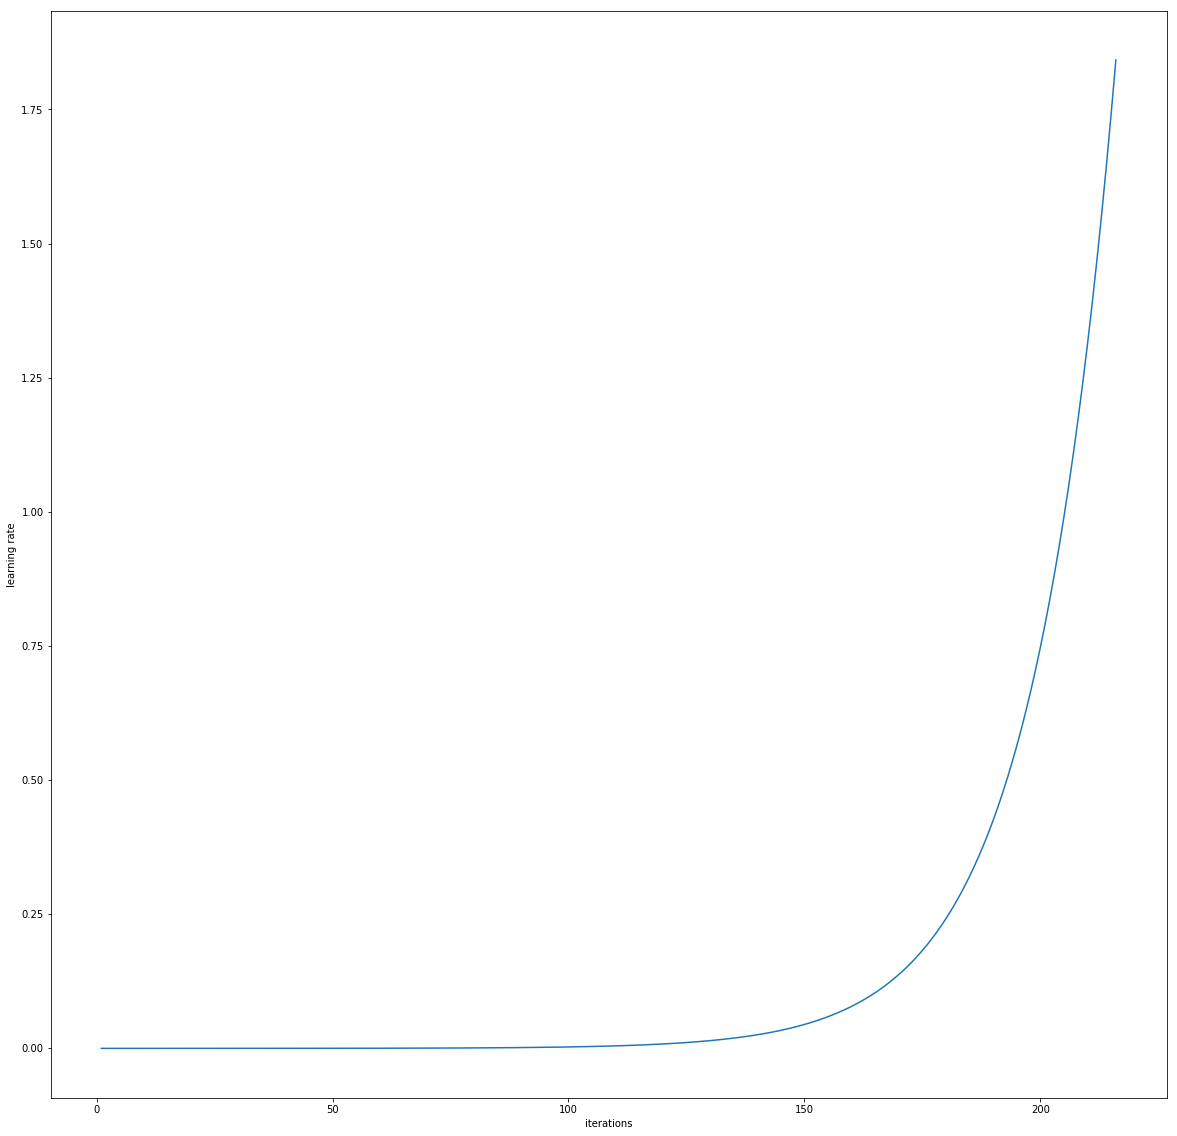

In [27]:
arch=resnet34
sz=360
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_paths(data_path, trn_name='simpsons_dataset', tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
lrf=learn.lr_find()
learn.sched.plot_lr()

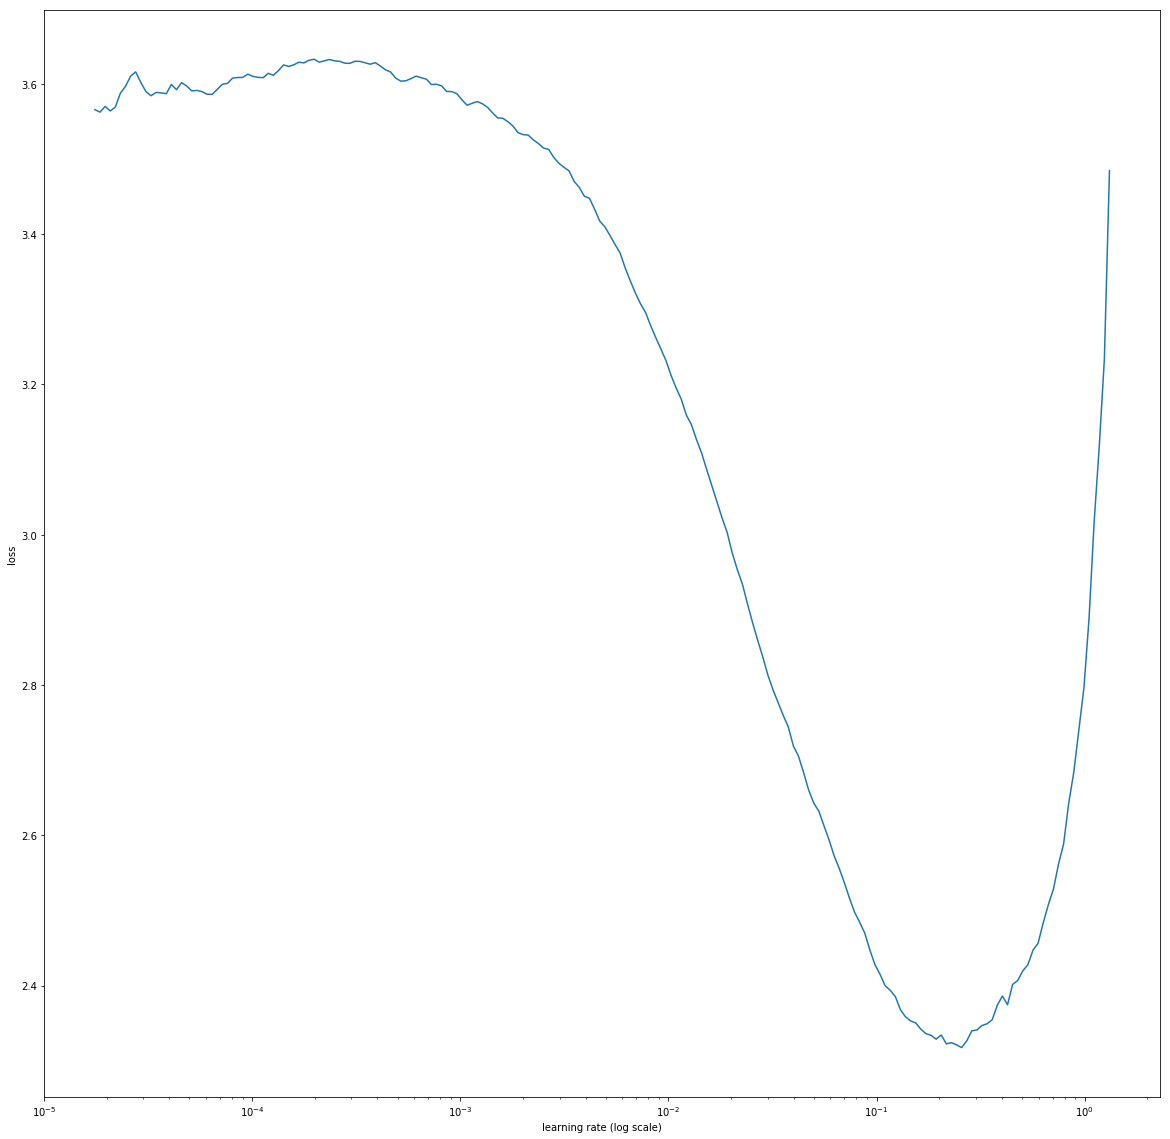

In [28]:
learn.sched.plot()

In [10]:
learn.fit(1e-2, 50)

epoch      trn_loss   val_loss   accuracy                    
    0      1.392087   0.941381   0.729523  
    1      1.072517   0.768986   0.772646                    
    2      0.915072   0.703706   0.79357                      
    3      0.843433   0.670593   0.80199                      
    4      0.761168   0.637846   0.809135                     
    5      0.71988    0.608891   0.822659                     
    6      0.708768   0.593348   0.826742                     
    7      0.659716   0.58469    0.825976                     
    8      0.620635   0.572967   0.832866                     
    9      0.614255   0.556486   0.840776                     
    10     0.566543   0.548092   0.841541                     
    11     0.554622   0.531754   0.849451                     
    12     0.536428   0.532414   0.848941                     
    13     0.503858   0.523817   0.851748                     
    14     0.4868     0.522683   0.849707                     
    15     0.

[0.4807281135206849, 0.8703750956876755]

In [11]:
learn.fit(1e-2/2, 30, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                     
    0      0.189478   0.475798   0.875734  
    1      0.196049   0.485105   0.872927                     
    2      0.18682    0.476021   0.874203                     
    3      0.199993   0.474388   0.877265                     
    4      0.17475    0.471039   0.876499                     
    5      0.203048   0.477277   0.877775                     
    6      0.19578    0.476274   0.875478                     
    7      0.178413   0.473251   0.873182                     
    8      0.163075   0.476305   0.877775                     
    9      0.166026   0.481301   0.874458                     
    10     0.184051   0.473509   0.876754                     
    11     0.163087   0.482915   0.878796                     
    12     0.161668   0.475151   0.873437                     
    13     0.174093   0.472709   0.878796                     
    14     0.156926   0.474335   0.87752                      
    15     

[0.46491761133351023, 0.8831334524113295]

In [12]:
learn.fit(1e-2/3, 30, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                     
    0      0.150243   0.467738   0.882623  
    1      0.135221   0.467503   0.882368                     
    2      0.159654   0.465032   0.884409                     
    3      0.134161   0.464103   0.879306                     
    4      0.143521   0.469632   0.882623                     
    5      0.146795   0.468478   0.883133                     
    6      0.143084   0.468458   0.883644                     
    7      0.15788    0.464132   0.883389                     
    8      0.148732   0.466089   0.882623                     
    9      0.148852   0.461489   0.883644                     
    10     0.14755    0.467632   0.885175                     
    11     0.136017   0.462522   0.88543                      
    12     0.142033   0.465271   0.883644                     
    13     0.139122   0.467328   0.885175                     
    14     0.139103   0.462221   0.884409                     
    15     

[0.469423584866173, 0.8844092880836948]

In [13]:
learn.precompute=False
learn.fit(1e-2, 10, cycle_len=1)

epoch      trn_loss   val_loss   accuracy                    
    0      0.791191   0.464327   0.878796  
    1      0.771485   0.455995   0.880582                    
    2      0.694001   0.44688    0.87803                     
    3      0.761961   0.440086   0.874203                    
    4      0.683407   0.432905   0.879306                    
    5      0.627996   0.438638   0.879561                    
    6      0.652306   0.433187   0.880582                    
    7      0.689979   0.430794   0.880071                    
    8      0.626715   0.431951   0.875734                    
    9      0.630496   0.432231   0.87752                     



[0.4322313360799067, 0.8775197754529217]

In [15]:
learn.save('224_lastlayer')

In [16]:
learn.load('224_lastlayer')

In [17]:
learn.unfreeze()

In [18]:
lr=np.array([1e-4,1e-3,1e-2])

In [19]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                    
    0      0.364533   0.203542   0.941822  
    1      0.232988   0.140112   0.962235                    
    2      0.175553   0.132757   0.966318                    
    3      0.154895   0.122982   0.96989                     
    4      0.116151   0.101383   0.976014                    
    5      0.094187   0.096384   0.975504                     
    6      0.096113   0.094957   0.97729                      



[0.09495709860438893, 0.9772901250318959]

In [20]:
log_preds = learn.predict()
log_preds.shape

(3919, 20)

In [21]:
preds = np.argmax(log_preds, axis=1)
probs = np.exp(log_preds[:,1])  

In [22]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [23]:
accuracy_np(probs, y)

0.9803521306455728

[[175   0   0   0   2   0   0   5   0   0   0   1   0   0   0   0   0   0   0   0]
 [  0 124   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0 265   0   0   0   0   1   0   0   0   1   0   0   0   0   1   0   1   0]
 [  1   0   0 229   2   0   0   1   0   0   0   0   0   0   1   2   0   0   3   0]
 [  1   0   0   0 193   1   0   1   0   0   0   0   0   0   0   1   0   1   0   0]
 [  1   0   0   0   0  90   0   1   0   0   0   0   0   1   0   0   0   0   1   0]
 [  0   1   0   0   0   0  90   0   0   0   0   0   0   0   0   0   1   0   0   0]
 [  0   1   1   0   2   0   0 443   0   0   0   0   2   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   1  98   0   0   0   0   0   0   0   0   0   0   1]
 [  0   0   0   0   0   0   0   1   0 240   0   0   0   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  59   0   0   0   0   1   0   0   2   0]
 [  0   0   1   0   1   0   0   0   0   0   0 266   0   0   0   0   0   0   3   0]
 [  

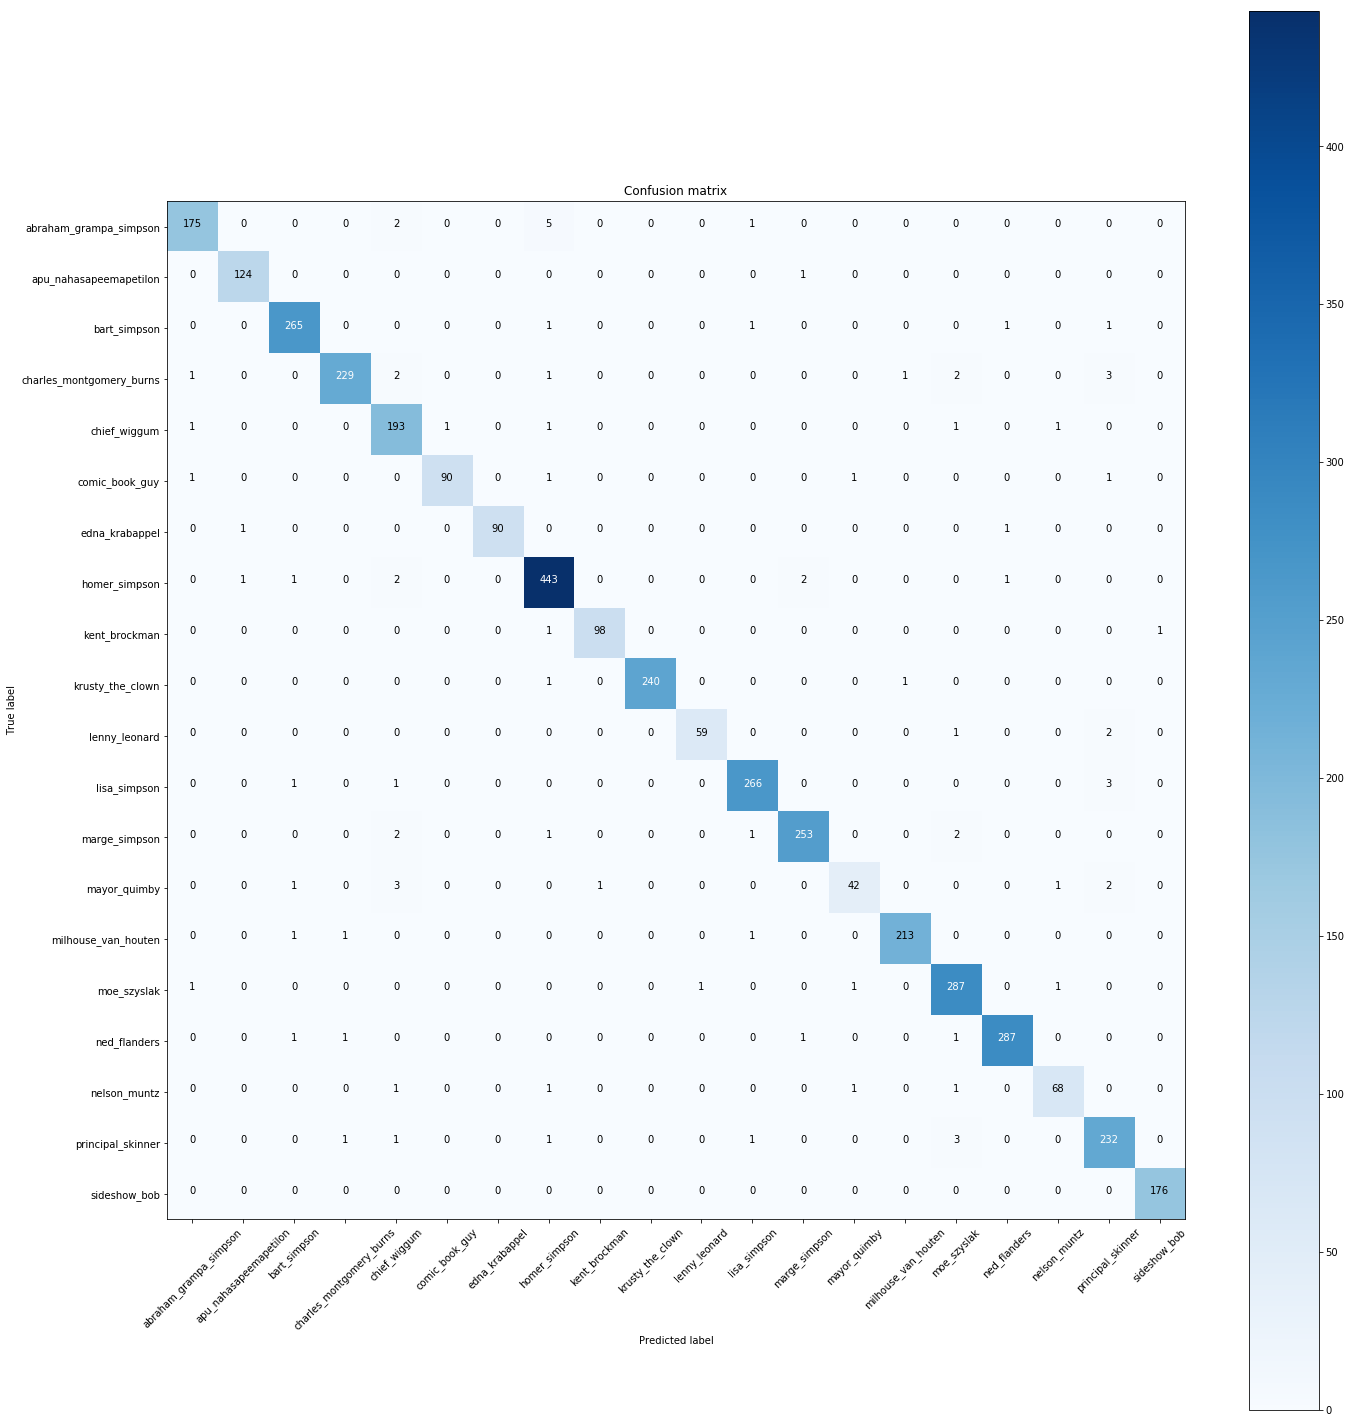

In [26]:
cm = confusion_matrix(y, preds)
plot_confusion_matrix(cm, data.classes)